<a href="https://colab.research.google.com/github/siddhant-parmar/CMPE_255_Group_4/blob/main/Team_Project_Restaurant_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART 1: EDA and Data Cleaning.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import os.path

In [3]:
comment = """RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)"""
print(comment)

RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)


In [4]:
yelp_business_df = pd.read_csv("/content/drive/My Drive/converted_data/yelp_academic_dataset_business.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   attributes.BYOB                        3519 non-null    object 
 1   attributes.AcceptsInsurance            7168 non-null    object 
 2   attributes.DriveThru                   6038 non-null    object 
 3   state                                  160585 non-null  object 
 4   attributes.HasTV                       44495 non-null   object 
 5   attributes.DietaryRestrictions         68 non-null      object 
 6   attributes.RestaurantsCounterService   40 non-null      object 
 7   attributes.Ambience                    43882 non-null   object 
 8   postal_code                            160475 non-null  object 
 9   address                                153859 non-null  object 
 10  attributes.WheelchairAccessible        29370 non-null   

Scrub and Explore

We will explore the following features for our study -

- Stars
- Is Open
- State and City
- Review Count
- Name
- Neighborhood (Not present in the current dataset hence we will not consider this)
- Postal Code
- Categories
- Latitude/Longitude
- Address

## 1. Stars

In [6]:
yelp_business_df.stars.value_counts()

4.0    34056
3.5    28835
4.5    28072
3.0    21583
5.0    19953
2.5    13720
2.0     8523
1.5     4157
1.0     1686
Name: stars, dtype: int64

In [7]:
yelp_business_df.stars = yelp_business_df['stars'].astype('category')

In [8]:
yelp_business_df.stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

## 2. Open/Shut down Businesses

In [9]:
yelp_business_df.is_open.value_counts()

1    123248
0     37337
Name: is_open, dtype: int64

In [10]:
yelp_business_df[yelp_business_df.is_open == 0][['name','city','state']].head(15)

name        city state
9     Capital City Barber Shop      Austin    TX
14       Uncle Sam's Pawn Shop    Columbus    OH
17      Saratoga Resort Villas   Kissimmee    FL
20            Jasmine Nail Spa    Portland    OR
21      Tire Town Auto Service   Vancouver    BC
22          Cascade Restaurant     Orlando    FL
25       Wolf Camera and Image     Atlanta    GA
35             Espresso Minute      Boston    MA
38                El Pollo Rey      Austin    TX
44                  Sam's Club   Fern Park    FL
54   Gigi's Roast Beef & Pizza  Burlington    MA
65  Olmecas Mexican Restaurant      Austin    TX
69       Valley Chrysler-Dodge     Boulder    CO
72             Camp Automotive     Atlanta    GA
79             CaveMan Cuisine      Austin    TX

Validated that these business listings are closed. e.g. https://www.yelp.com/biz/cks-bbq-and-catering-henderson?osq=CK%27S+BBQ+%26+Catering Only working with open businesses in this study.

In [11]:
yelp_business_df = yelp_business_df[yelp_business_df.is_open == 1]

## 3. State and City

In [12]:
yelp_business_df.state.value_counts()

MA     27353
OR     18806
TX     18500
FL     17916
GA     13824
BC     12734
OH      9072
WA      2575
CO      2431
CA        12
NH         4
VA         2
NY         2
ON         2
NC         1
WI         1
DC         1
OK         1
KY         1
DE         1
ABE        1
MI         1
ME         1
KS         1
MN         1
WY         1
HI         1
AZ         1
NM         1
Name: state, dtype: int64

In [13]:
print("Number of Unique States: " + str(len(yelp_business_df.state.unique())))

Number of Unique States: 29


In [14]:
yelp_business_df[yelp_business_df.state == 'CA'][['name','city', 'state']]

name         city state
1819                                  Katia Photography     Portland    CA
47726                                      Here We Grow      Atlanta    CA
70731                     Disney Carribean Beach Resort      Orlando    CA
71354                                          Vain Spa       Irvine    CA
95203                                      Diosa Dreads     Portland    CA
103921                       Kristen Beccia Photography       Austin    CA
128258                    San Jose Jazz Summer Fesitval     San Jose    CA
130618  New Albany Elite Dental - Andrew E. Skasko, DDS   New Albany    CA
144056                        Samuel Rivera Photography      Orlando    CA
148696                                      DMA Academy    Vancouver    CA
153081                                    MicroArtistry  Morgan Hill    CA
153988                                    Hair By Sarah       Austin    CA

A lot of invalid data, for example Austin is in Texas, but shown here in California. Another example is that Vancouver is shown in California, USA instead of British Columbia, Canada.

Also there are a lot of invalid states like 'ABE'.

For this project, we are considering cities and states situated in USA only.

### 3.1 Problem 1: Invalid States

In [15]:
USA_states = pd.read_csv('/content/drive/My Drive/converted_data/state_table.csv')

In [16]:
USA_states.head() # https://statetable.com/

id        name  ... census_division_name circuit_court
0   1     Alabama  ...   East South Central            11
1   2      Alaska  ...              Pacific             9
2   3     Arizona  ...             Mountain             9
3   4    Arkansas  ...   West South Central             8
4   5  California  ...              Pacific             9

[5 rows x 17 columns]

In [17]:
USA_states = USA_states[['name','abbreviation','country','census_region','census_division']]

In [18]:
USA_states = USA_states.rename(index=str, columns={"name" : "State_Name", "abbreviation" : "State_Abb"})

In [19]:
USA_states.head(60)

State_Name State_Abb country  census_region  census_division
0                    Alabama        AL     USA            3.0              6.0
1                     Alaska        AK     USA            4.0              9.0
2                    Arizona        AZ     USA            4.0              8.0
3                   Arkansas        AR     USA            3.0              7.0
4                 California        CA     USA            4.0              9.0
5                   Colorado        CO     USA            4.0              8.0
6                Connecticut        CT     USA            1.0              1.0
7                   Delaware        DE     USA            3.0              5.0
8                    Florida        FL     USA            3.0              5.0
9                    Georgia        GA     USA            3.0              5.0
10                    Hawaii        HI     USA            4.0              9.0
11                     Idaho        ID     USA            4.0              8.0
12                  Illinois        IL     USA            2.0              3.0
13                   Indiana        IN     USA            2.0              3.0
14                      Iowa        IA     USA            2.0              4.0
15                    Kansas        KS     USA            2.0              4.0
16                  Kentucky        KY     USA            3.0              6.0
17                 Louisiana        LA     USA            3.0              7.0
18                     Maine        ME     USA            1.0              1.0
19                  Maryland        MD     USA            3.0              5.0
20             Massachusetts        MA     USA            1.0              1.0
21                  Michigan        MI     USA            2.0              3.0
22                 Minnesota        MN     USA            2.0              4.0
23               Mississippi        MS     USA            3.0              6.0
24                  Missouri        MO     USA            2.0              4.0
25                   Montana        MT     USA            4.0              8.0
26                  Nebraska        NE     USA            2.0              4.0
27                    Nevada        NV     USA            4.0              8.0
28             New Hampshire        NH     USA            1.0              1.0
29                New Jersey        NJ     USA            1.0              2.0
30                New Mexico        NM     USA            4.0              8.0
31                  New York        NY     USA            1.0              2.0
32            North Carolina        NC     USA            3.0              5.0
33              North Dakota        ND     USA            2.0              4.0
34                      Ohio        OH     USA            2.0              3.0
35                  Oklahoma        OK     USA            3.0              7.0
36                    Oregon        OR     USA            4.0              9.0
37              Pennsylvania        PA     USA            1.0              2.0
38              Rhode Island        RI     USA            1.0              1.0
39            South Carolina        SC     USA            3.0              5.0
40              South Dakota        SD     USA            2.0              4.0
41                 Tennessee        TN     USA            3.0              6.0
42                     Texas        TX     USA            3.0              7.0
43                      Utah        UT     USA            4.0              8.0
44                   Vermont        VT     USA            1.0              1.0
45                  Virginia        VA     USA            3.0              5.0
46                Washington        WA     USA            4.0              9.0
47             West Virginia        WV     USA            3.0              5.0
48                 Wisconsin        WI     USA            2.0              3.0
49                   Wyoming        WY     USA            4.0       

In [20]:
yelp_business_df = pd.merge(yelp_business_df, USA_states, left_on='state', right_on='State_Abb', how='left')

In [21]:
yelp_business_df.head(3)

attributes.BYOB attributes.AcceptsInsurance  ... census_region census_division
0             NaN                         NaN  ...           4.0             8.0
1             NaN                         NaN  ...           4.0             9.0
2             NaN                         NaN  ...           4.0             9.0

[3 rows x 65 columns]

In [22]:
yelp_business_df[yelp_business_df.State_Abb.isna()][['address','city', 'state']]

address       city state
99193  1698 Robson Street  Vancouver   ABE

This business are have an invalid state, hence we will drop these rows. For this project we will only consider states from USA and remove those from Canada.

In [23]:
yelp_business_df.country.value_counts()

USA       110511
Canada     12736
Name: country, dtype: int64

In [24]:
yelp_business_df = yelp_business_df[yelp_business_df.country == 'USA']

In [25]:
yelp_business_df = yelp_business_df.drop(['State_Name','country'], axis=1)

In [26]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110511 entries, 0 to 123247
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   attributes.BYOB                        3062 non-null    object  
 1   attributes.AcceptsInsurance            6346 non-null    object  
 2   attributes.DriveThru                   5010 non-null    object  
 3   state                                  110511 non-null  object  
 4   attributes.HasTV                       25183 non-null   object  
 5   attributes.DietaryRestrictions         33 non-null      object  
 6   attributes.RestaurantsCounterService   27 non-null      object  
 7   attributes.Ambience                    24600 non-null   object  
 8   postal_code                            110500 non-null  object  
 9   address                                104819 non-null  object  
 10  attributes.WheelchairAccessible        22216

In [27]:
yelp_business_df.head()

attributes.BYOB attributes.AcceptsInsurance  ... census_region census_division
0             NaN                         NaN  ...           4.0             8.0
1             NaN                         NaN  ...           4.0             9.0
2             NaN                         NaN  ...           4.0             9.0
3             NaN                         NaN  ...           3.0             5.0
4             NaN                         NaN  ...           3.0             5.0

[5 rows x 63 columns]

### 3.2 Wrong City/State combination

In [28]:
uscities = pd.read_csv('/content/drive/My Drive/converted_data/uscities.csv')

In [29]:
uscities.head()

city  ...          id
0     New York  ...  1840034016
1  Los Angeles  ...  1840020491
2      Chicago  ...  1840000494
3        Miami  ...  1840015149
4       Dallas  ...  1840019440

[5 rows x 17 columns]

In [30]:
uscities.city = uscities.city.str.lower()

In [31]:
uscities = uscities.drop(['city_ascii','county_fips','lat','lng','source','incorporated','timezone','id'], axis=1)

In [32]:
yelp_business_df[['city','state']].head()

city state
0      Boulder    CO
1     Portland    OR
2     Portland    OR
3  Orange City    FL
4      Atlanta    GA

In [33]:
yelp_business_df.city = yelp_business_df.city.str.lower()

In [34]:
yelp_business_df = pd.merge(yelp_business_df, uscities, left_on=['city','state'], right_on=['city','state_id'], how='left')

In [35]:
yelp_business_df[yelp_business_df.state_id.isna()][['city','state']].head()

city state
22        needham    MA
25  jamaica plain    MA
34      brookline    MA
40        allston    MA
56     swampscott    MA

In [36]:
yelp_business_df[yelp_business_df.state == 'CA'][['city','state_id','state']]

city state_id state
1285       portland      NaN    CA
32927       atlanta      NaN    CA
48709       orlando      NaN    CA
49148        irvine       CA    CA
65543      portland      NaN    CA
71502        austin      NaN    CA
88253      san jose       CA    CA
89888    new albany      NaN    CA
99163       orlando      NaN    CA
102371    vancouver      NaN    CA
105411  morgan hill       CA    CA
106026       austin      NaN    CA

There are some obvious errors like marking Austin in CA or marking Vancouver as in CA. Instead of going into fixing the errors, we will drop these very few rows for now.

In [37]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.state_id)]

In [38]:
yelp_business_df = yelp_business_df.drop(['state_id'], axis=1)

In [39]:
yelp_business_df.city.isnull().value_counts()

False    97900
Name: city, dtype: int64

In [40]:
yelp_business_df.state.isnull().value_counts()

False    97900
Name: state, dtype: int64

## 4. User Reviews

In [41]:
yelp_business_df.review_count.describe()

count    97900.000000
mean        58.695332
std        150.238462
min          5.000000
25%          8.000000
50%         18.000000
75%         48.000000
max       9185.000000
Name: review_count, dtype: float64

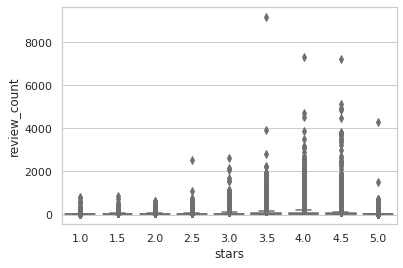

In [42]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data = yelp_business_df)
sns_plot.figure.savefig("review-count-boxplot.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


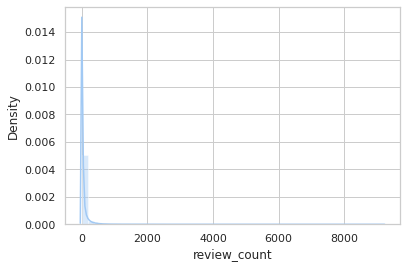

In [43]:
sns_plot = sns.distplot(yelp_business_df.review_count)
sns_plot.figure.savefig("review-count-distplot.png")

In [44]:
yelp_business_df.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      48.0000
0.9000     135.0000
0.9500     243.0000
0.9900     629.0000
0.9990    1698.1010
0.9999    4020.9047
Name: review_count, dtype: float64

In [45]:
yelp_business_df.review_count.skew()

13.372157369457524

There's heavy positive skew in the review_count feature, lets see if this valid data or not.

In [46]:
yelp_business_df.sort_values(by=['review_count'], ascending=False).iloc[0]

attributes.BYOB                                                              NaN
attributes.AcceptsInsurance                                                  NaN
attributes.DriveThru                                                         NaN
state                                                                         OR
attributes.HasTV                                                             NaN
                                                     ...                        
population                                                           2.07478e+06
density                                                                     1894
military                                                                   False
ranking                                                                        1
zips                           97227 97221 97220 97229 97203 97202 97201 9720...
Name: 44145, Length: 70, dtype: object

Manually validated from yelp the top few businesses and their corresponding review counts. Looks good. Lets see if we can transform the feature to make it more gaussian and better distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


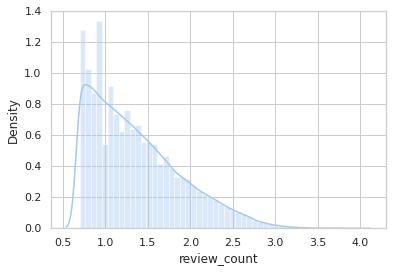

In [47]:
sns_plot = sns.distplot(np.log10(yelp_business_df.review_count))
sns_plot.figure.savefig("log-review-count-distplot.png")

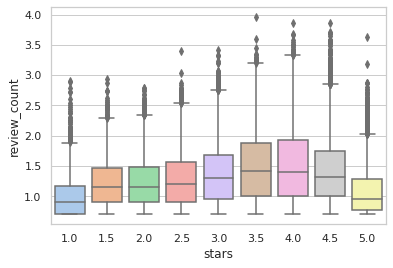

In [48]:
sns_plot = sns.boxplot(x = yelp_business_df.stars, y=np.log10(yelp_business_df.review_count))
sns_plot.figure.savefig("log-review-count-boxplot.png")

As we see above, there are usually lesser number of reviews for very low and very high ratings. The inter-quartile range is similar for each of them which implies people generally have concensus on a business' star ratings. The more common star ratings, i.e. 3-4.5 have higher median number of review counts. 

In [49]:
np.log10(yelp_business_df.review_count).skew()

0.848677940357736

Log10 transform of review counts looks like a good valid feature to have. Keeping the transform. Making sure correlation with 'stars' remains unaffected before doing the transform.

In [50]:
yelp_business_df.stars.corr(yelp_business_df.review_count)

0.03004192363857404

In [51]:
yelp_business_df.stars.corr(np.log10(yelp_business_df.review_count))

-0.00012420718842806884

In [52]:
yelp_business_df.review_count = np.log10(yelp_business_df.review_count)

In [53]:
yelp_business_df.review_count.isnull().value_counts()

False    97900
Name: review_count, dtype: int64

### 5. Name Feature

In [54]:
yelp_business_df.name.head()

0        Oskar Blues Taproom
1    Flying Elephants at PDX
2             The Reclaimory
3                Great Clips
4          Crossfit Terminus
Name: name, dtype: object

In [55]:
yelp_business_df.name.isnull().value_counts()

False    97900
Name: name, dtype: int64

In [56]:
yelp_business_df.name = yelp_business_df.name.str.lower()

## 6. Pin Code

In [57]:
yelp_business_df.postal_code.head()

0    80302
1    97218
2    97214
3    32763
4    30316
Name: postal_code, dtype: object

In [58]:
yelp_business_df.postal_code.isnull().value_counts()

False    97889
True        11
Name: postal_code, dtype: int64

In [59]:
yelp_business_df[yelp_business_df.postal_code.isnull()][['name','address', 'city', 'state']].head()

name  ... state
7974   davidson mesa scenic overlook  ...    CO
22381               austin tree pros  ...    TX
49905  central ohio appliance repair  ...    OH
52430                      convelabs  ...    FL
54571           choice home warranty  ...    TX

[5 rows x 4 columns]

Checked on Yelp, looks like the businesses with NaN addresses actually have address missing on Yelp. e.g. https://www.yelp.com/biz/xtreme-cleaning-az-phoenix-2?osq=Xtreme+Cleaning+AZ

In [60]:
yelp_business_df[pd.notnull(yelp_business_df.address) & yelp_business_df.postal_code.isnull()][['name','address', 'city', 'state']].head()

name  ... state
7974  davidson mesa scenic overlook  ...    CO

[1 rows x 4 columns]

Even the rows where address is not NaN, there are postal_code missing for these listings on Yelp. e.g. https://www.yelp.com/biz/monroe-street-farmers-market-madison?osq=Monroe+Street+Farmer%27s+Market. Replacing all NaN values with 'NOT_AVAILABLE'

In [61]:
yelp_business_df.postal_code = yelp_business_df.postal_code.fillna('NOT_AVAILABLE')

In [62]:
yelp_business_df.postal_code = yelp_business_df.postal_code.str.lower()

In [63]:
yelp_business_df.postal_code.isnull().value_counts()

False    97900
Name: postal_code, dtype: int64

## 7. Categories

In [64]:
yelp_business_df.categories.head()

0    Gastropubs, Food, Beer Gardens, Restaurants, B...
1    Salad, Soup, Sandwiches, Delis, Restaurants, C...
2    Antiques, Fashion, Used, Vintage & Consignment...
3                           Beauty & Spas, Hair Salons
4    Gyms, Active Life, Interval Training Gyms, Fit...
Name: categories, dtype: object

In [65]:
yelp_business_df.categories.isnull().value_counts()

False    97820
True        80
Name: categories, dtype: int64

In [66]:
yelp_business_df[yelp_business_df.categories.isnull()][['name','city','state']].head()

name          city state
564    aaa cooper transportation  pflugerville    TX
1799  value dry of massachusetts        boston    MA
3046             mail house plus      portland    OR
3266        praxair distribution        austin    TX
3654        absolute oil company       peabody    MA

In [67]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.categories)]

In [68]:
yelp_business_df.categories = yelp_business_df.categories.str.lower()

In [69]:
yelp_business_df.categories.str.contains('restaurant|food').value_counts()

False    66044
True     31776
Name: categories, dtype: int64

Keeping only food/restaurant related listings for our study.

In [70]:
yelp_business_df = yelp_business_df[yelp_business_df.categories.str.contains('restaurant|food')]

## 8. Longitudes and Latitudes

In [71]:
yelp_business_df.latitude.isnull().value_counts()

False    31776
Name: latitude, dtype: int64

In [72]:
yelp_business_df.longitude.isnull().value_counts()

False    31776
Name: longitude, dtype: int64

In [73]:
yelp_business_df[yelp_business_df.longitude.isnull()]['latitude']

Series([], Name: latitude, dtype: float64)

In [74]:
yelp_business_df[yelp_business_df.latitude.isnull()]['longitude']

Series([], Name: longitude, dtype: float64)

In [75]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.latitude) & pd.notnull(yelp_business_df.longitude)]

In [76]:
yelp_business_df[['latitude','longitude']].describe()

latitude     longitude
count  31776.000000  31776.000000
mean      36.815213    -91.111962
std        6.561637     17.530523
min       28.136102   -123.124627
25%       30.247626    -97.792184
50%       39.851498    -84.218776
75%       42.384192    -81.364596
max       49.155176    -70.868355

Got the bounding box i.e. max/min lat longs for continental United States from here - https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States

In [77]:
top = 49.3457868 # north latitude
left = -124.7844079 # west longitude
right = -66.9513812 # east longitude
bottom =  24.7433195 # south latitude

In [78]:
yelp_business_df[(yelp_business_df.latitude > top) | (yelp_business_df.latitude < bottom) | (yelp_business_df.longitude > right) | (yelp_business_df.longitude < left)][['name','city','state']]

Empty DataFrame
Columns: [name, city, state]
Index: []

There are 0 business who's latitude/longitude fall outside the bounding box of continental USA. Dropping them

In [79]:
# Reomve this code (no need)
yelp_business_df = yelp_business_df[(yelp_business_df.latitude <= top) & (yelp_business_df.latitude >= bottom) & (yelp_business_df.longitude<=right) & (yelp_business_df.longitude>=left)]

## 9. Address

In [80]:
yelp_business_df.address.isnull().value_counts()

False    31287
True       489
Name: address, dtype: int64

In [81]:
yelp_business_df[yelp_business_df.address.isnull()][['name','address','city','state']].head()

name address     city state
476   phantom gourmet food festival     NaN   boston    MA
703                    los munchies     NaN  orlando    FL
784                   the north end     NaN   boston    MA
795                  mrbeast burger     NaN   newton    MA
1447  roxy's gourmet grilled cheese     NaN   boston    MA

As we see a lot of the places above with null address are actually mobile restaurants, like food trucks etc. Marking all these addresses as 'NOT_AVAILABLE'.

In [82]:
yelp_business_df.address = yelp_business_df.address.fillna('NOT_AVAILABLE')

In [83]:
yelp_business_df.address = yelp_business_df.address.str.lower()

In [84]:
yelp_business_df.address.isnull().value_counts()

False    31776
Name: address, dtype: int64

# Join Data

## Joining with tip data

Get all user_ids that provided tips for this business

In [85]:
yelp_tips_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_tip.csv')

In [86]:
yelp_tips_df.head()

user_id  ...                                               text
0  WCjg0jdHXMlwbqS9tZUx8Q  ...                               Carne asada chips...
1  42-Z02y9bABShAGZhuSzrQ  ...  Best happy hour from 3pm to 6pm! $1 off martin...
2  5u7E3LYp_3eB8dLuUBazXQ  ...  Nice people, skilled staff, clean location - b...
3  wDWoMG5N9oI4DJ-p7z8EBg  ...  1/2-price bowling & the "Very" Old Fashion are...
4  JmuFlorjjRshHTKzTwNtgg  ...  Solid gold's. Great sauna. Great staff, too. E...

[5 rows x 5 columns]

In [87]:
yelp_business_df = yelp_business_df.merge(yelp_tips_df[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [88]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [89]:
yelp_business_df = yelp_business_df.drop_duplicates(subset='business_id')

In [90]:
yelp_business_df['users'] = yelp_business_df[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
yelp_business_df = yelp_business_df.drop(['user_id',0], axis=1)

## Joining with review data

Get all user_ids that provided reviews for this business

In [92]:
yelp_reviews_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_review.csv')

In [93]:
yelp_reviews_df.head()

cool                 user_id               review_id  ... stars funny useful
0     1  ak0TdVmGKo4pwqdJSTLwWw  lWC-xP3rd6obsecCYsGZRg  ...   4.0     1      3
1     0  YoVfDbnISlW0f7abNQACIg  8bFej1QE5LXp4O05qjGqXA  ...   4.0     0      1
2     0  eC5evKn1TWDyHCyQAwguUw  NDhkzczKjLshODbqDoNLSg  ...   5.0     0      0
3     1  SFQ1jcnGguO0LYWnbbftAA  T5fAqjjFooT4V0OeZyuk1w  ...   2.0     1      1
4     0  0kA0PAJ8QFMeveQWHFqz2A  sjm_uUcQVxab_EeLCqsYLg  ...   4.0     0      0

[5 rows x 9 columns]

In [94]:
yelp_business_df = yelp_business_df.merge(yelp_reviews_df[['business_id','user_id']], left_on='business_id', right_on='business_id', how='left')

In [95]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.groupby('business_id').apply(lambda x: x['user_id'].unique()).reset_index(), 
               left_on='business_id', right_on='business_id', how='left')

In [96]:
yelp_business_df = yelp_business_df.drop_duplicates(subset='business_id')

In [97]:
yelp_business_df['users2'] = yelp_business_df[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
yelp_business_df = yelp_business_df.drop(['user_id',0], axis=1)

In [99]:
yelp_business_df = yelp_business_df.reset_index(drop=True)

## Union of all users interacting with this business

In [100]:
def union(x):
    a = x['users']
    b = x['users2']
    return list(set(a) | set(b))

In [101]:
yelp_business_df.users = yelp_business_df.apply(union, axis=1)

In [102]:
yelp_business_df = yelp_business_df.drop(['users2'], axis=1)

## Joining user profiles with business

In [103]:
yelp_users_df = pd.read_csv('/content/drive/My Drive/converted_data/yelp_academic_dataset_user.csv')

In [104]:
yelp_users_df.head()

elite  ... useful
0       2006,2007,2008,2009,2010,2011,2012,2013,2014  ...  15038
1  2007,2008,2009,2010,2011,2012,2013,2014,2015,2...  ...  21272
2                                          2010,2011  ...    188
3                      2009,2010,2011,2012,2013,2014  ...   7234
4                                     2009,2010,2011  ...   1577

[5 rows x 22 columns]

In [105]:
yelp_users_df.yelping_since = yelp_users_df.yelping_since.astype(np.datetime64)

In [106]:
yelp_users_df['months_since_yelping'] = ((pd.to_datetime('today') - yelp_users_df.yelping_since)/np.timedelta64(1, 'M'))

In [107]:
yelp_users_df.columns

Index(['elite', 'user_id', 'compliment_note', 'compliment_more',
       'compliment_hot', 'compliment_list', 'compliment_cool', 'cool',
       'compliment_photos', 'fans', 'compliment_funny', 'compliment_writer',
       'average_stars', 'compliment_profile', 'funny', 'review_count', 'name',
       'compliment_plain', 'compliment_cute', 'friends', 'yelping_since',
       'useful', 'months_since_yelping'],
      dtype='object')

In [108]:
yelp_users_df['total_compliments'] = yelp_users_df[yelp_users_df.columns[yelp_users_df.columns.to_series().str.contains('compliment')]].sum(axis=1)

In [109]:
def get_user_stats(x):
    data = yelp_users_df[yelp_users_df.user_id.isin(x['users'])]
    result = x[['business_id']]
    result['mean_user_review_counts'] = data.review_count.mean()
    result['mean_months_since_yelping'] = data.months_since_yelping.mean()
    result['mean_user_fans'] = data.fans.mean()
    result['mean_total_compliments'] = data.total_compliments.mean()
    return result

In [110]:
yelp_business_df.head()

attributes.BYOB  ...                                              users
0             NaN  ...  [Mp27LHWQy_RlbU56HJ5eHg, scorlJp8YMJdBUcLGcMua...
1             NaN  ...  [14-_4NPqbKlb188Y9R4DkA, Peqt13tHOx_b7xBhitxzN...
2             NaN  ...  [nan, NvHk8zOMVToGSK9cI_mv3g, 1Jua4k8nD9izG1Se...
3             NaN  ...  [nan, AC7VDjPYudKUT13BVd0VXg, So1OxJNIZCQBN2AS...
4             NaN  ...  [kRdyS6PRBWOAeA_vr-RBrw, s2cq37UYF5NaQ9xf1ZKMT...

[5 rows x 71 columns]

In [111]:
yelp_business_df = yelp_business_df.merge(yelp_business_df.apply(get_user_stats, axis=1), left_on='business_id', right_on='business_id', how='left')

In [112]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31776 entries, 0 to 31775
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   attributes.BYOB                        2745 non-null   object  
 1   attributes.AcceptsInsurance            54 non-null     object  
 2   attributes.DriveThru                   4505 non-null   object  
 3   state                                  31776 non-null  object  
 4   attributes.HasTV                       21315 non-null  object  
 5   attributes.DietaryRestrictions         31 non-null     object  
 6   attributes.RestaurantsCounterService   24 non-null     object  
 7   attributes.Ambience                    20972 non-null  object  
 8   postal_code                            31776 non-null  object  
 9   address                                31776 non-null  object  
 10  attributes.WheelchairAccessible        10421 non-null  obj

In [113]:
yelp_business_df.head()

attributes.BYOB  ... mean_total_compliments
0             NaN  ...              14.323529
1             NaN  ...             625.107843
2             NaN  ...              30.000000
3             NaN  ...               0.500000
4             NaN  ...              67.416667

[5 rows x 75 columns]

# Writing out cleaned data

In [114]:
cleaned_cols = ['stars', 'business_id', 'name', 'city', 'state', 
                'postal_code', 'latitude', 'longitude',
               'categories', 'review_count', 'mean_user_review_counts', 
                'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']

In [115]:
yelp_business_df.head()

attributes.BYOB  ... mean_total_compliments
0             NaN  ...              14.323529
1             NaN  ...             625.107843
2             NaN  ...              30.000000
3             NaN  ...               0.500000
4             NaN  ...              67.416667

[5 rows x 75 columns]

In [116]:
yelp_business_df[cleaned_cols].head()

stars             business_id  ... mean_user_fans mean_total_compliments
0   4.0  6iYb2HFDywm3zjuRg0shjw  ...       1.970588              14.323529
1   4.0  tCbdrRPZA0oiIYSmHG3J0w  ...      25.843137             625.107843
2   4.5  jFYIsSb7r1QeESVUnXPHBw  ...       4.500000              30.000000
3   3.5  rYs_1pNB_RMtn5WQh55QDA  ...       2.000000               0.500000
4   4.0  HPA_qyMEddpAEtFof02ixg  ...       5.291667              67.416667

[5 rows x 14 columns]

In [117]:
yelp_business_df[cleaned_cols].to_csv('/content/drive/My Drive/converted_data/1.0-sm-business_cleaned-1.csv', index=False)

In [118]:
yelp_business_df.to_csv('/content/drive/My Drive/converted_data/1.0-sm-business_cleaned-raw.csv', index=False)

# PART 2: Feature Engineering

In [119]:
# yet to do

In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

In [121]:
comment = """RUNNING - Full Feature Engineering.
This script will run the entire feature engineering steps 
that I have implemented including both location-specific 
and non-location-specific features and generate the following files - 
1. Plots for various analyses (png)
2. Final feature engineered data files (csv & npz)
NOTE: This script needs the output files of 1.0-sm-initial-eda-and-cleaning 
AND it will fail for the downsampled dataset.
"""
print(comment)
from time import sleep
sleep(5)

RUNNING - Full Feature Engineering.
This script will run the entire feature engineering steps 
that I have implemented including both location-specific 
and non-location-specific features and generate the following files - 
1. Plots for various analyses (png)
2. Final feature engineered data files (csv & npz)
NOTE: This script needs the output files of 1.0-sm-initial-eda-and-cleaning 
AND it will fail for the downsampled dataset.



# Obtain Data

In [122]:
data = pd.read_csv('/content/drive/My Drive/converted_data/1.0-sm-business_cleaned-1.csv')

In [123]:
data = data.dropna()

In [124]:
data.head()

stars             business_id  ... mean_user_fans mean_total_compliments
0    4.0  6iYb2HFDywm3zjuRg0shjw  ...       1.970588              14.323529
1    4.0  tCbdrRPZA0oiIYSmHG3J0w  ...      25.843137             625.107843
2    4.5  jFYIsSb7r1QeESVUnXPHBw  ...       4.500000              30.000000
3    3.5  rYs_1pNB_RMtn5WQh55QDA  ...       2.000000               0.500000
4    4.0  HPA_qyMEddpAEtFof02ixg  ...       5.291667              67.416667

[5 rows x 14 columns]

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 31774
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stars                      28647 non-null  float64
 1   business_id                28647 non-null  object 
 2   name                       28647 non-null  object 
 3   city                       28647 non-null  object 
 4   state                      28647 non-null  object 
 5   postal_code                28647 non-null  int64  
 6   latitude                   28647 non-null  float64
 7   longitude                  28647 non-null  float64
 8   categories                 28647 non-null  object 
 9   review_count               28647 non-null  float64
 10  mean_user_review_counts    28647 non-null  float64
 11  mean_months_since_yelping  28647 non-null  float64
 12  mean_user_fans             28647 non-null  float64
 13  mean_total_compliments     28647 non-null  flo

# Feature Engineering

## Cuisine Feature

Identifying the following popular cuisines of food that we'll use for our analysis - 
- Mexican
- American (new or traditional)
- Italian
- Indian
- Chinese
- Mediterranean

In [126]:
cuisines = ['mexican', 'american', 'italian', 'indian', 
            'chinese', 'mediterranean', 'pizza', 'bar']

In [127]:
def get_cuisine(x):
    for cuisine in cuisines:
        if cuisine in x:
            return cuisine
    else:
        return 'other'

In [128]:
data['cuisine'] = data.categories.apply(lambda x: get_cuisine(x))

## Clustering Lat/Lon to identify closeby businesses

Using DBSCAN to cluster businesses within a 2km radius i.e. eps=2kms and parameterizing such that every point gets a cluster, no noise i.e. min_samples=1

In [129]:
coords = data[['latitude', 'longitude']].values

In [130]:
from sklearn.cluster import DBSCAN

In [131]:
kms_per_radian = 6371.0088
epsilon = 2 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')

In [132]:
labels = db.fit_predict(np.radians(coords))

In [133]:
len(set(db.labels_))

255

In [134]:
data['location_cluster'] = labels

In [135]:
data.head()

stars             business_id  ...   cuisine location_cluster
0    4.0  6iYb2HFDywm3zjuRg0shjw  ...  american                0
1    4.0  tCbdrRPZA0oiIYSmHG3J0w  ...     other                1
2    4.5  jFYIsSb7r1QeESVUnXPHBw  ...     other                2
3    3.5  rYs_1pNB_RMtn5WQh55QDA  ...     other                0
4    4.0  HPA_qyMEddpAEtFof02ixg  ...     pizza                3

[5 rows x 16 columns]

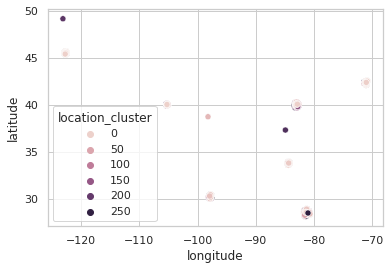

In [136]:
sns_plot = sns.scatterplot(x = "longitude", y = "latitude", hue="location_cluster", data=data)
sns_plot.figure.savefig('clustered-lat-long.png')

In [137]:
# import plotly
# plotly.offline.init_notebook_mode(connected=True)

# import plotly.offline as py
# data['text'] = data['name'] + '' + data['city'] + ', ' + data['state']

# scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
#     [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

# map_data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = data['longitude'],
#         lat = data['latitude'],
#         text = data['text'],
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=1,
#                 color='rgba(102, 102, 102)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = data['location_cluster'],
#             cmax = data['location_cluster'].max(),
#             colorbar=dict(
#                 title="Restaurants on Yelp"
#             )
#         ))]

# layout = dict(
#         title = 'Restaurants on Yelp <br>(Hover for business names)',
#         colorbar = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showland = True,
#             landcolor = "rgb(250, 250, 250)",
#             subunitcolor = "rgb(217, 217, 217)",
#             countrycolor = "rgb(217, 217, 217)",
#             countrywidth = 0.5,
#             subunitwidth = 0.5
#         ),
#     )

# fig = dict( data=map_data, layout=layout )
# py.iplot( fig, validate=False)

## Count of nearby restaurants with similar categories

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
vect = TfidfVectorizer(analyzer='word', stop_words='english')

In [140]:
from sklearn.metrics.pairwise import linear_kernel

In [141]:
def count_similar(a):
    sims = np.where(a>0.9)
    return len(sims[0])

In [142]:
def get_sim_counts(temp):
    X = vect.fit_transform(temp.categories)
    cosine_sim = linear_kernel(X)
    sim_counts = np.apply_along_axis(count_similar, 1, cosine_sim)
    return sim_counts

In [143]:
for cluster in data.location_cluster.unique():
    temp = data[data.location_cluster == cluster]
    sim_counts = get_sim_counts(temp)
    data.loc[data.business_id.isin(temp.business_id), 'sim_counts'] = sim_counts

In [144]:
data.sim_counts.describe()

count    28647.000000
mean        15.536321
std         31.738220
min          1.000000
25%          1.000000
50%          2.000000
75%         13.000000
max        230.000000
Name: sim_counts, dtype: float64

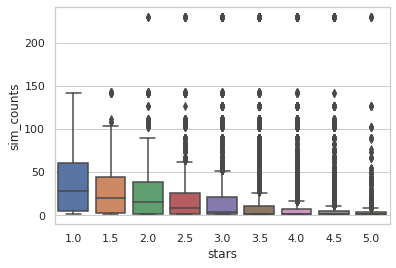

In [145]:
sns_plot = sns.boxplot(x='stars', y='sim_counts', data=data)
sns_plot.figure.savefig('sim-categories-stars-boxplot.png')

## Count of nearby restaurants with similar users visiting

In [146]:
from sklearn.preprocessing import normalize

In [147]:
def get_user_sim_counts(temp):
    X = normalize(temp[['mean_user_review_counts', 'mean_months_since_yelping', 'mean_user_fans', 'mean_total_compliments']])
    cosine_sim = linear_kernel(X)
    user_sim_counts = np.apply_along_axis(count_similar, 1, cosine_sim)
    return user_sim_counts

In [148]:
for cluster in data.location_cluster.unique():
    temp = data[data.location_cluster == cluster]
    user_sim_counts = get_user_sim_counts(temp)
    data.loc[data.business_id.isin(temp.business_id), 'user_sim_counts'] = user_sim_counts

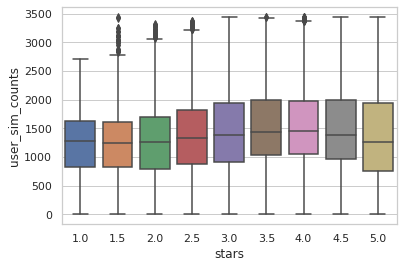

In [149]:
sns_plot = sns.boxplot(x='stars', y='user_sim_counts', data=data)
sns_plot.figure.savefig('sim-users-stars-boxplot.png')

## Exploding categories into separate columns

In [150]:
explode = pd.DataFrame(data.categories.str.split(',').tolist(), index = data.business_id).stack()

In [151]:
explode = explode.reset_index()[[0, 'business_id']]

In [152]:
explode.columns = ['category', 'business_id']

In [153]:
explode.head()

category             business_id
0     gastropubs  6iYb2HFDywm3zjuRg0shjw
1           food  6iYb2HFDywm3zjuRg0shjw
2   beer gardens  6iYb2HFDywm3zjuRg0shjw
3    restaurants  6iYb2HFDywm3zjuRg0shjw
4           bars  6iYb2HFDywm3zjuRg0shjw

In [154]:
explode['present'] = 1

In [155]:
explode = explode.groupby(['business_id','category'])['present'].mean().unstack(fill_value=0)

In [156]:
explode.head()

category                 acai bowls   accessories  ...  wraps  yelp events
business_id                                        ...                    
--Q3mAcX9t63f7Xcbn7LVA            0             0  ...      0            0
--UNNdnHRhsyFUbDgumdtQ            0             0  ...      0            0
--hkbIWgBKBOZq4VcNwdhQ            0             0  ...      0            0
--oGYZhLMMvwfHmtyYJVxQ            0             0  ...      0            0
-00d-Qb0q2TcWn-8LBHDZg            0             0  ...      0            0

[5 rows x 1144 columns]

In [157]:
explode.columns.name = None

In [158]:
explode = explode.reset_index()

In [159]:
explode.head()

business_id   acai bowls  ...  wraps  yelp events
0  --Q3mAcX9t63f7Xcbn7LVA            0  ...      0            0
1  --UNNdnHRhsyFUbDgumdtQ            0  ...      0            0
2  --hkbIWgBKBOZq4VcNwdhQ            0  ...      0            0
3  --oGYZhLMMvwfHmtyYJVxQ            0  ...      0            0
4  -00d-Qb0q2TcWn-8LBHDZg            0  ...      0            0

[5 rows x 1145 columns]

In [160]:
data = pd.merge(data, explode, left_on='business_id', right_on='business_id', how='left')

In [161]:
data = data.drop('categories', axis=1)

In [162]:
data.head()

stars             business_id  ... wraps yelp events
0    4.0  6iYb2HFDywm3zjuRg0shjw  ...     0           0
1    4.0  tCbdrRPZA0oiIYSmHG3J0w  ...     0           0
2    4.5  jFYIsSb7r1QeESVUnXPHBw  ...     0           0
3    3.5  rYs_1pNB_RMtn5WQh55QDA  ...     0           0
4    4.0  HPA_qyMEddpAEtFof02ixg  ...     0           0

[5 rows x 1161 columns]

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 28646
Columns: 1161 entries, stars to yelp events
dtypes: float64(10), int64(1146), object(5)
memory usage: 254.0+ MB


## Transforming Categorical to Dummies

In [164]:
data = pd.get_dummies(data, columns=['city', 'state', 'postal_code', 'cuisine'])

In [165]:
data.head()

stars             business_id  ... cuisine_other  cuisine_pizza
0    4.0  6iYb2HFDywm3zjuRg0shjw  ...             0              0
1    4.0  tCbdrRPZA0oiIYSmHG3J0w  ...             1              0
2    4.5  jFYIsSb7r1QeESVUnXPHBw  ...             1              0
3    3.5  rYs_1pNB_RMtn5WQh55QDA  ...             1              0
4    4.0  HPA_qyMEddpAEtFof02ixg  ...             0              1

[5 rows x 1890 columns]

## Bucketizing review counts

Bucketizing review counts into 10 quantile buckets

In [166]:
data.review_count.describe()

count    28647.000000
mean         1.763757
std          0.563404
min          0.698970
25%          1.342423
50%          1.748188
75%          2.176091
max          3.963079
Name: review_count, dtype: float64

In [167]:
data['review_count_bucket'] = pd.qcut(data.review_count, 10)

In [168]:
data.head()

stars             business_id  ... cuisine_pizza  review_count_bucket
0    4.0  6iYb2HFDywm3zjuRg0shjw  ...             0       (1.914, 2.079]
1    4.0  tCbdrRPZA0oiIYSmHG3J0w  ...             0       (2.079, 2.274]
2    4.5  jFYIsSb7r1QeESVUnXPHBw  ...             0         (1.0, 1.255]
3    3.5  rYs_1pNB_RMtn5WQh55QDA  ...             0         (0.698, 1.0]
4    4.0  HPA_qyMEddpAEtFof02ixg  ...             1       (1.415, 1.591]

[5 rows x 1891 columns]

In [169]:
data = pd.get_dummies(data, columns=['review_count_bucket'])

In [170]:
data.head()

stars  ... review_count_bucket_(2.524, 3.963]
0    4.0  ...                                  0
1    4.0  ...                                  0
2    4.5  ...                                  0
3    3.5  ...                                  0
4    4.0  ...                                  0

[5 rows x 1900 columns]

# Exporting transformed data for Modelling

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 28646
Columns: 1900 entries, stars to review_count_bucket_(2.524, 3.963]
dtypes: float64(10), int64(1145), object(2), uint8(743)
memory usage: 273.4+ MB


In [172]:
data.stars = (data.stars * 2).astype(np.int)

In [173]:
data.stars.value_counts()

8     7776
7     6238
9     5045
6     3836
5     2295
4     1618
10    1079
3      652
2      108
Name: stars, dtype: int64

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28647 entries, 0 to 28646
Columns: 1900 entries, stars to review_count_bucket_(2.524, 3.963]
dtypes: float64(9), int64(1146), object(2), uint8(743)
memory usage: 273.4+ MB


In [175]:
data.select_dtypes(include='object').head()

business_id                      name
0  6iYb2HFDywm3zjuRg0shjw       oskar blues taproom
1  tCbdrRPZA0oiIYSmHG3J0w   flying elephants at pdx
2  jFYIsSb7r1QeESVUnXPHBw           boxwood biscuit
3  rYs_1pNB_RMtn5WQh55QDA  chautauqua general store
4  HPA_qyMEddpAEtFof02ixg       mr g's pizza & subs

In [176]:
from scipy.sparse import csr_matrix, save_npz

In [177]:
csr = csr_matrix(data.drop(['name','business_id','stars'], axis=1).values)

In [178]:
save_npz(matrix=csr, file='/content/drive/My Drive/converted_data/1.1-sm-feature-engineered-1.npz')

In [179]:
data.stars.to_csv('/content/drive/My Drive/converted_data/1.1-sm-feature-engineered-1-labels.csv', index=False, header=True)

In [180]:
data.drop(['name','business_id','stars'], axis=1).to_csv('/content/drive/My Drive/converted_data/1.1-sm-feature-engineered-1.csv', index=False)

In [181]:
data.head()

stars  ... review_count_bucket_(2.524, 3.963]
0      8  ...                                  0
1      8  ...                                  0
2      9  ...                                  0
3      7  ...                                  0
4      8  ...                                  0

[5 rows x 1900 columns]

# PART 3: Modelling

In [182]:
# yet to do

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
    
import seaborn as sns
sns.set(style="whitegrid")

In [184]:
comment = """RUNNING - Modelling with Full Feature Engineered data.
This script will run the model training for full feature engineered data
that I have generated in previous notebook
NOTE: This script needs the output files of 1.1-sm-feature-engineering 
AND it will fail for the downsampled dataset.
"""
print(comment)
from time import sleep
sleep(5)

RUNNING - Modelling with Full Feature Engineered data.
This script will run the model training for full feature engineered data
that I have generated in previous notebook
NOTE: This script needs the output files of 1.1-sm-feature-engineering 
AND it will fail for the downsampled dataset.



# Obtain Data

In [185]:
from scipy.sparse import csr_matrix, load_npz

In [186]:
train = load_npz('/content/drive/My Drive/converted_data/1.1-sm-feature-engineered-1.npz')
# train = pd.read_csv('1.1-sm-feature-engineered-1.csv')

In [187]:
train.shape

(28647, 1897)

In [188]:
labels = pd.read_csv('/content/drive/My Drive/converted_data/1.1-sm-feature-engineered-1-labels.csv')

In [189]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28647 entries, 0 to 28646
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stars   28647 non-null  int64
dtypes: int64(1)
memory usage: 223.9 KB


In [190]:
labels.stars.values

array([8, 8, 9, ..., 6, 6, 9])

### Modelling label as binary

Here I am defining the success measure of a restaurant as being a star rating of >= 3.5 (i.e. label >=7)

In [191]:
labels = labels >= 7

In [192]:
labels = labels.astype(np.int)

In [193]:
labels.stars.value_counts()

1    20138
0     8509
Name: stars, dtype: int64

# Setup for Modelling

## Splitting data

In [194]:
X = train
y = labels.stars.values

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_cv, y_train, y_cv = train_test_split( 
              X, y, test_size = 0.4, random_state = 42, stratify = y) 

In [197]:
X_cv, X_test, y_cv, y_test = train_test_split(X_cv, y_cv, test_size=0.1, random_state=42, stratify=y_cv)

In [198]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(17188, 1897)
(10313, 1897)
(1146, 1897)


In [199]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

## Training Function

In [200]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [201]:
def trainModelGrid(estimator, params, train, y, cv=5):
    model = GridSearchCV(estimator, params, n_jobs=-1, scoring='accuracy',cv=cv)
    model.fit(train, y)
    return model

In [202]:
def trainModelRandom(estimator, params, train, y, cv=5, n_iter=5):
    model = RandomizedSearchCV(estimator, params, n_jobs=-1, scoring='accuracy',cv=cv, n_iter=n_iter)
    model.fit(train, y)
    return model

# Modelling

## Lasso Regression

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
logreg = LogisticRegression(penalty='l1', dual=False, solver='liblinear', random_state=0)

In [205]:
import scipy.stats as st

In [206]:
params_dist = {  
    "max_iter": st.randint(100,300),
    "C": st.uniform(1.1, 3.0)
}
params_grid = {  
    "max_iter": [200, 210, 220],
    "C": [1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
}

In [207]:
%%time 
model = trainModelRandom(logreg, params_dist, X_train, y_train)

CPU times: user 1.92 s, sys: 363 ms, total: 2.28 s
Wall time: 25.9 s


In [208]:
model.best_score_

0.7914244144962521

In [209]:
model.best_estimator_

LogisticRegression(C=1.7140411212854845, max_iter=280, penalty='l1',
                   random_state=0, solver='liblinear')

In [210]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [211]:
from sklearn.metrics import accuracy_score

In [212]:
accuracy_score(y_cv, cvPredicted)

0.7883254145253563

## Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
dt = DecisionTreeClassifier(random_state=0)

In [215]:
params_grid = {
    "max_depth" : np.arange(1, 25, 1)
}

In [216]:
%%time
model = trainModelGrid(dt, params_grid, X_train, y_train)

CPU times: user 1.44 s, sys: 81.3 ms, total: 1.52 s
Wall time: 48.4 s


In [217]:
model.best_score_

0.7685599157645734

In [218]:
model.best_estimator_

DecisionTreeClassifier(max_depth=12, random_state=0)

In [219]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [220]:
accuracy_score(y_cv, cvPredicted)

0.7741685251624164

In [221]:
model.cv_results_['mean_test_score']

array([0.73946985, 0.74197166, 0.74377514, 0.75512023, 0.76338198,
       0.76506894, 0.76518564, 0.76710482, 0.76797788, 0.76710514,
       0.76687275, 0.76855992, 0.76402175, 0.76413817, 0.76035644,
       0.75948374, 0.75593432, 0.75506209, 0.75174555, 0.75151291,
       0.75046612, 0.74860412, 0.74645135, 0.74569501])

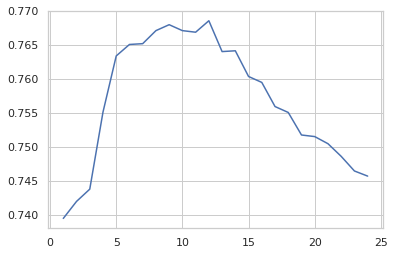

In [222]:
sns_plot = sns.lineplot(x=np.arange(1,25,1), y=model.cv_results_['mean_test_score'])
sns_plot.figure.savefig('decision-tree-depth-vs-score.png')

In [223]:
model.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [227]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 7.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [228]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785196 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785196 to fit



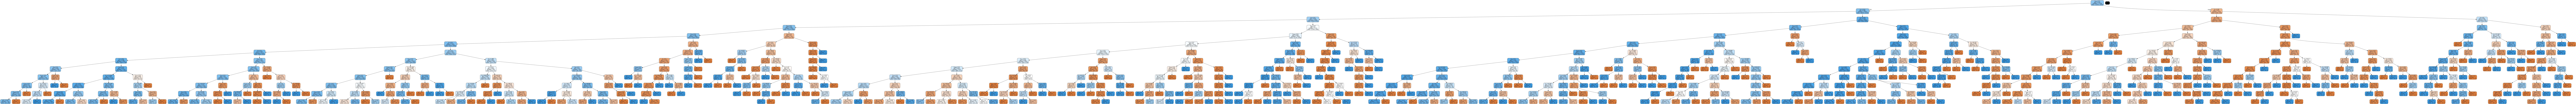

In [229]:
dot_data = StringIO()

export_graphviz(model.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('dtree-graph-full-dataset.png')
Image(graph.create_png())

## Gradient Boosted Trees

In [259]:
from xgboost.sklearn import XGBClassifier

In [260]:
xgb = XGBClassifier(random_state=0)

In [261]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params_dist = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [ ]:
%%time
model = trainModelRandom(xgb, params_dist, X_train, y_train, cv=20, n_iter=50)

In [ ]:
model.best_score_

In [ ]:
model.best_estimator_

In [ ]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [ ]:
accuracy_score(y_cv, cvPredicted)

## Random Forest Classifier

In [236]:
!pip uninstall sklearn
!pip uninstall scikit-learn
!pip install sklearn

Found existing installation: sklearn 0.0
Uninstalling sklearn-0.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/sklearn-0.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled sklearn-0.0
Found existing installation: scikit-learn 0.20.3
Uninstalling scikit-learn-0.20.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.20.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.20.3
     |████████████████████████████████| 23.2 MB 2.5 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=d9f9f4c113b5ab48381144341052830971d10e884a646a0530e845e94a78c466
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
rf = RandomForestClassifier(random_state=0)

In [239]:
params_dist = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40)
}

In [240]:
%%time
model = trainModelRandom(rf, params_dist, X_train, y_train)

CPU times: user 1.9 s, sys: 200 ms, total: 2.1 s
Wall time: 17 s


In [241]:
model.best_score_

0.7808359326854545

In [242]:
model.best_estimator_

RandomForestClassifier(max_depth=26, n_estimators=21, random_state=0)

In [243]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [244]:
accuracy_score(y_cv, cvPredicted)

0.7863861146126249

## Support Vector Classifier

In [245]:
from sklearn.svm import LinearSVC

In [246]:
svc = LinearSVC(dual=False, random_state=0)

In [247]:
params = {  
    "C": [1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
}

In [248]:
params_dist = {  
    "C": st.uniform(1.0, 2.0)
}

In [249]:
%%time
model = trainModelRandom(svc, params_dist, X_train, y_train)

CPU times: user 796 ms, sys: 18.1 ms, total: 814 ms
Wall time: 9.98 s


In [250]:
model.best_score_

0.7946245076548656

In [251]:
model.best_estimator_

LinearSVC(C=2.618633326288424, dual=False, random_state=0)

In [252]:
cvPredicted = model.best_estimator_.predict(X_cv)

In [253]:
accuracy_score(y_cv, cvPredicted)

0.7910404344031805